# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [107]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [108]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [150]:
#  1. Get the total rides for each city type
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
urban_cities_df= pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df= pyber_data_df[pyber_data_df["type"]=="Suburban"]


urban_ride_count = urban_cities_df.count()["ride_id"]
suburban_ride_count = suburban_cities_df.count()["ride_id"]
rural_ride_count  = rural_cities_df.count()["ride_id"]


In [154]:
# 2. Get the total drivers for each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count.sum()

78.0

In [144]:
#  3. Get the total amount of fares for each city type
urban_fares_sum = urban_cities_df.sum()["fare"]
suburban_fares_sum = suburban_cities_df.sum()["fare"]
rural_fares_sum = rural_cities_df.sum()["fare"]

urban_fares_sum

39854.380000000005

In [170]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare = urban_fares_sum/ urban_ride_count
suburban_avg_fare= suburban_fares_sum/suburban_ride_count
rural_avg_fare = rural_fares_sum / rural_ride_count
urban_avg_fare


24.52577230769231

In [171]:
# 5. Get the average fare per driver for each city typ-counte. 
urban_driver_fare = float(urban_fares_sum.sum() / urban_driver_count.sum())
suburban_driver_fare= float(suburban_fares_sum.sum()/suburban_driver_count.sum())
rural_driver_fare = float(rural_fares_sum.sum()/ rural_driver_count.sum())

urban_driver_fare


16.571467775467777

In [175]:
#Creating Arrays to store summary data for coutns
total_ride_summary = [rural_ride_count.sum(),suburban_ride_count.sum(),urban_ride_count.sum()]
total_drivers_summary = [rural_driver_count.sum(), suburban_driver_count.sum(), urban_driver_count.sum()]
total_fares_summary = [rural_fares_sum.sum(), suburban_fares_sum.sum(), urban_fares_sum.sum()]

#Average fare arrays to build data frame
average_fare_rider = [rural_avg_fare.mean(), suburban_avg_fare.mean(), urban_avg_fare.mean()]
average_fare_driver =[rural_driver_fare, suburban_driver_fare, urban_driver_fare]




pyber_summary_df = pd.DataFrame({ "Total Rides": total_ride_summary,
                                 "Total Drivers": total_drivers_summary,
                                 "Total Fares": total_fares_summary,
                                 "Average Fare per Ride": average_fare_rider,
                                 "Average Fare per Driver": average_fare_driver
                                
                                }
                               )
pyber_summary_df= pyber_summary_df.rename(index={0:"Rural",
                               1:"Suburban",
                               2:"Urban"
})

pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers              float64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [161]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [181]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
#pyber_summary_df["Average Fare per Ride"] = pyber_data_df["Average Fare per Ride"].map("${:,.1f}".format)
#pyber_summary_df["Total Rides"] = pyber_data_df["Total Rides"].map("{:,}".format)
# pyber_summary_df["Total Drivers"] = pyber_data_df["Total Drivers"].map("{:,}".format)

pyber_summary_df

ValueError: Unknown format code 'f' for object of type 'str'

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [209]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [210]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_df  = pyber_data_df.groupby(["type","date"]).sum()["fare"]
date_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [211]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
date_df = date_df.reset_index()
date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [221]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

date_df2 = date_df



In [222]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

date_new_df =date_df.loc["2019-01-01 00:08:16":"2019-04-29 00:20:54"]

date_new_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN


In [223]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

date_new_df.index = pd.to_datetime(date_new_df.index)

In [227]:
# 7. Check that the datatype for the index is datetime using df.info()
date_new_df.info()

date_new_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2197 entries, 2019-01-01 00:08:16 to 2019-04-29 00:20:22
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1510 non-null   float64
dtypes: float64(3)
memory usage: 68.7 KB


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN


In [240]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_final_df =date_new_df.resample("W").sum()

date_final_df.index

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28', '2019-05-05'],
              dtype='datetime64[ns]', name='date', freq='W-SUN')

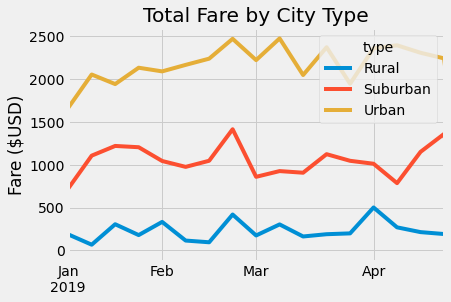

<Figure size 432x288 with 0 Axes>

In [267]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.

#Grabbing index as x axis values
x= date_final_df.index

#Defining y values using the fares of Rural, Suburban and Urban
y1= date_final_df['Rural']
y2= date_final_df['Suburban']
y3= date_final_df['Urban']


style.use('fivethirtyeight')

date_final_df.plot()

plt.title('Total Fare by City Type')
plt.xlabel('')
plt.ylabel('Fare ($USD)')

plt.xlim("2019-01-06","2019-04-28")

plt.show()
plt.savefig('PyBer_fare_summary.png')
#plt.plot(x,y1)
#plt.plot(x,y2)
#plt.plot(x,y3)

#Formatting plot
